# Computational Data Aalytics with Python

Our team came up with a topic for the A2 group project: Analyzing Gender Pay Gaps and Compensation Disparities Across Different roles and Departments. We believe this topic will allow us to apply the analytical techniques learned in class to examine patterns of bias in recruitment practices and explore potential solutions.

**Group 8** : Abdallah Alzamgan - Ania de Chavigny - Don Richardson Bayya- Gabriel Yearwood - Marta Martins - Tariq Bin Jibreel


Data can be found at https://www.kaggle.com/datasets/nilimajauhari/glassdoor-analyze-gender-pay-gap

In [2]:
# Libraries that we used in the code.
# Please run this cell first.

import pandas as pd # This library is used for Dataframes, like excel in python for data manipulation and analysis.
import matplotlib.pyplot as plt # This library is used for static, animated, and interactive visualizations.
import seaborn as sns # This visualization library is based on matplotlib. We used this to provide a high-level interface for informative statistics.
import plotly.express as px # A library that contains functions that we used to create entire figures such as dynamic maps.
import folium # Folium is a Python library that we used for creating our interactive map.
import statsmodels.formula.api as sm
import numpy as np
from scipy import stats

In [3]:
# This step reads the CSV file and loads it into a DataFrame named df_gender using Panda
# Than Display the first five rows of the DataFrame to inspect the data.
df_gender = pd.read_csv('/content/Glassdoor Gender Pay Gap.csv')
df_gender.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


We focused our analysis on the Gender Pay Gap, Age and Compensation, Educational Impact, Departmental Disparities, Performance and Compensation, and Seniority Trends because these factors collectively reveal key insights into compensation inequities. They highlight how demographics, education, departmental culture, performance evaluations, and career progression interact to shape pay differences in modern workplaces.

## Gender Pay Gap

### Is there a significant difference in base pay between male and female employees across different departments?

In [6]:
# Group the data by department and gender, and calculate the average base pay
department_gender_pay = df_gender.groupby(['Dept', 'Gender'])['BasePay'].mean().reset_index()

# Pivot the table to have departments as rows, genders as columns, and average base pay as values
pay_diff_table = department_gender_pay.pivot(index='Dept', columns='Gender', values='BasePay')

# Calculate the pay difference between male and female
pay_diff_table['Pay Difference'] = pay_diff_table['Male'] - pay_diff_table['Female']

# Display the results
print(pay_diff_table)

Gender                Female           Male  Pay Difference
Dept                                                       
Administration  87071.873684   96170.744898     9098.871214
Engineering     90774.955056  101433.000000    10658.044944
Management      92679.011494   99482.297297     6803.285803
Operations      86456.156250   93118.438596     6662.282346
Sales           92867.079208  102349.481132     9482.401924


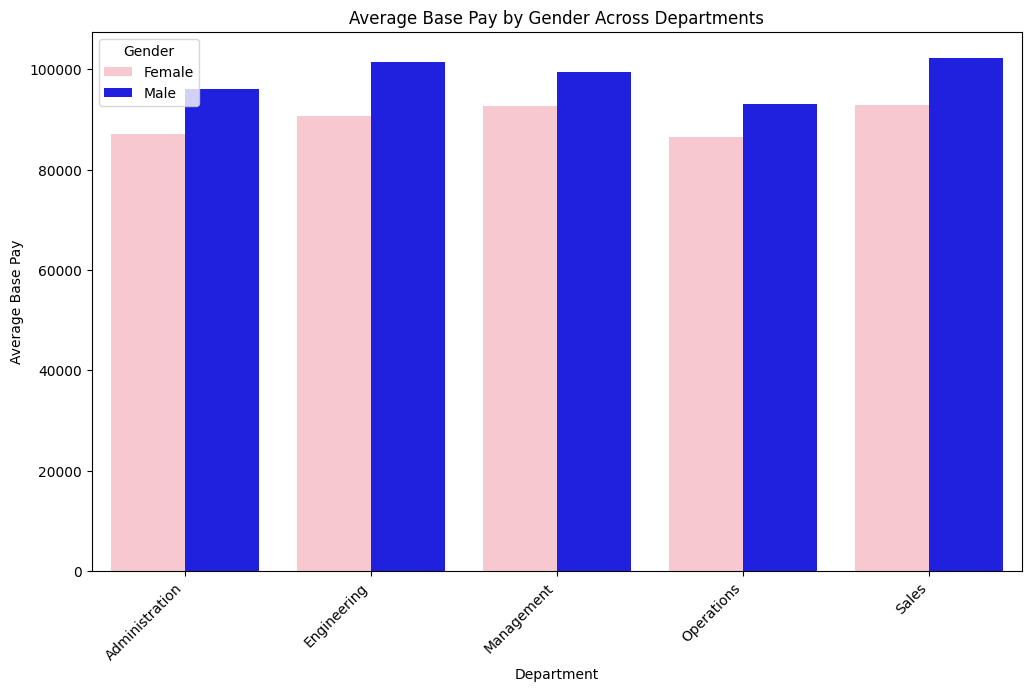

In [7]:
# Pivot the table to have departments as rows, genders as columns, and average base pay as values
pay_diff_table = department_gender_pay.pivot(index='Dept', columns='Gender', values='BasePay')

# Reset index for better plotting
pay_diff_table = pay_diff_table.reset_index()

# Melt the table to long format for seaborn
pay_melted = pay_diff_table.melt(id_vars='Dept', var_name='Gender', value_name='Average Base Pay')

# Create a bar plot to visualize the pay by gender across departments
plt.figure(figsize=(12, 7))  # Adjust figure size if needed
sns.barplot(x='Dept', y='Average Base Pay', hue='Gender', data=pay_melted, palette={'Female': 'pink', 'Male': 'blue'})
plt.title('Average Base Pay by Gender Across Departments')
plt.xlabel('Department')
plt.ylabel('Average Base Pay')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Gender')
plt.show()


###Do men and women with similar seniority levels and performance evaluations receive different bonuses?

In [8]:
# Group the data by gender, seniority, and performance evaluation, and calculate the average bonus
bonus_comparison = df_gender.groupby(['Gender', 'Seniority', 'PerfEval'])['Bonus'].mean().reset_index()

# Display the results
print(bonus_comparison)

    Gender  Seniority  PerfEval        Bonus
0   Female          1         1  3587.000000
1   Female          1         2  4564.000000
2   Female          1         3  6010.812500
3   Female          1         4  7117.600000
4   Female          1         5  8179.000000
5   Female          2         1  3877.900000
6   Female          2         2  5158.360000
7   Female          2         3  6166.450000
8   Female          2         4  7507.947368
9   Female          2         5  8534.222222
10  Female          3         1  3867.875000
11  Female          3         2  5136.315789
12  Female          3         3  6671.454545
13  Female          3         4  7874.850000
14  Female          3         5  9016.142857
15  Female          4         1  4604.285714
16  Female          4         2  5143.714286
17  Female          4         3  7176.000000
18  Female          4         4  8415.150000
19  Female          4         5  9291.900000
20  Female          5         1  4738.458333
21  Female

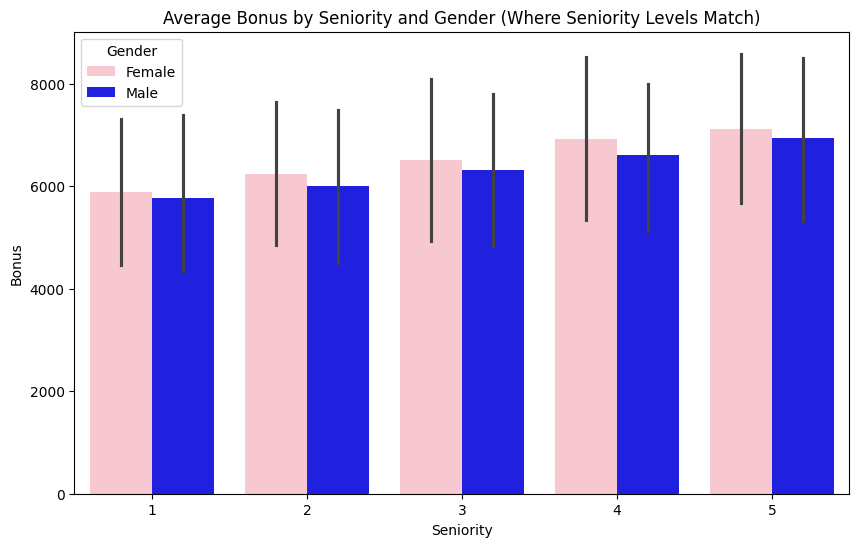

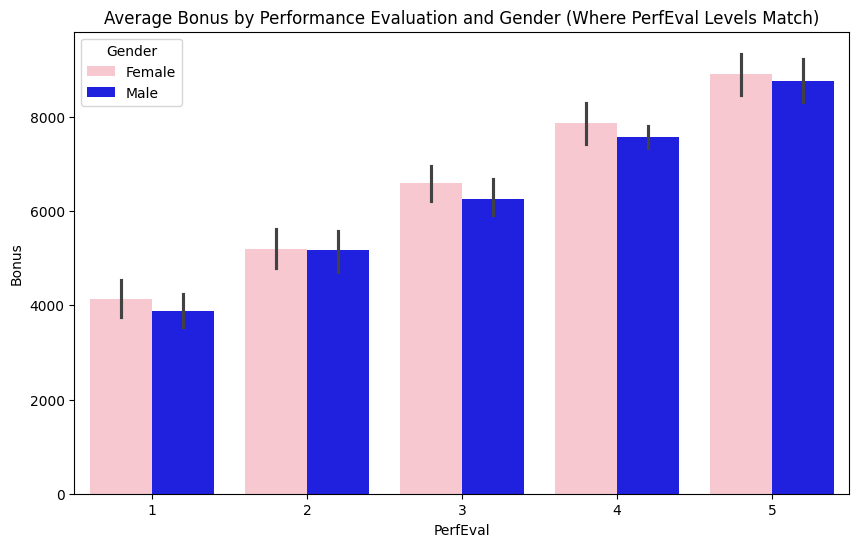

In [9]:
# Group the data by gender, seniority, and performance evaluation, and calculate the average bonus
bonus_comparison = df_gender.groupby(['Gender', 'Seniority', 'PerfEval'])['Bonus'].mean().reset_index()

# Visualization 1: Seniority level of male = female
seniority_comparison = bonus_comparison[bonus_comparison['Seniority'].isin(bonus_comparison['Seniority'].unique())]  # Filter for seniority levels present for both genders

plt.figure(figsize=(10, 6))
sns.barplot(x='Seniority', y='Bonus', hue='Gender', data=seniority_comparison, palette={'Female': 'pink', 'Male': 'blue'})
plt.title('Average Bonus by Seniority and Gender (Where Seniority Levels Match)')
plt.show()

# Visualization 2: PerfEval of male = female
perfeval_comparison = bonus_comparison[bonus_comparison['PerfEval'].isin(bonus_comparison['PerfEval'].unique())]  # Filter for performance evaluation levels present for both genders

plt.figure(figsize=(10, 6))
sns.barplot(x='PerfEval', y='Bonus', hue='Gender', data=perfeval_comparison, palette={'Female': 'pink', 'Male': 'blue'})
plt.title('Average Bonus by Performance Evaluation and Gender (Where PerfEval Levels Match)')
plt.show()

## Age and Compensation

###How does compensation (base pay and bonus) vary across different age groups, and does this trend differ by gender?

<ipython-input-18-8a449a01e4b0>:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



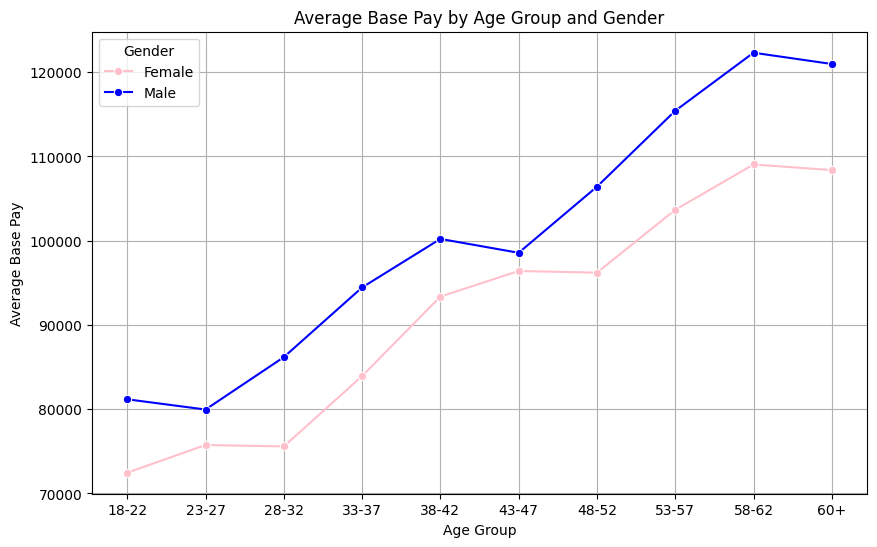

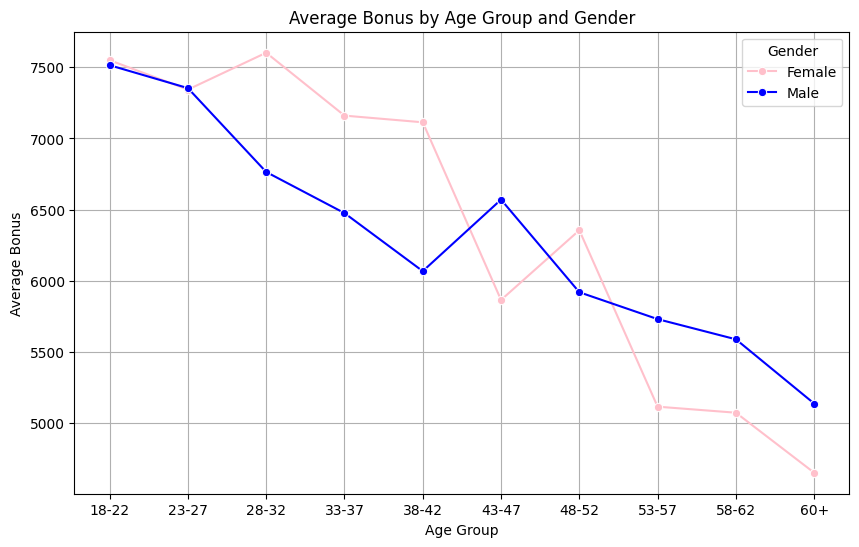

In [18]:
# Create age groups with consistent 5-year intervals
df_gender['Age Group'] = pd.cut(df_gender['Age'],
                                 bins=[18, 23, 28, 33, 38, 43, 48, 53, 58, 63, 100],
                                 labels=['18-22', '23-27', '28-32', '33-37', '38-42', '43-47', '48-52', '53-57', '58-62', '60+'])

# Group by Age Group and Gender to calculate average Base Pay and Bonus
age_compensation = df_gender.groupby(['Age Group', 'Gender'])[['BasePay', 'Bonus']].mean().reset_index()

# Plot the line graph for Base Pay
plt.figure(figsize=(10, 6))
sns.lineplot(data=age_compensation, x='Age Group', y='BasePay', hue='Gender', marker='o', palette={'Female': 'pink', 'Male': 'blue'})
plt.title('Average Base Pay by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average Base Pay')
plt.grid(True)
plt.show()

# Plot the line graph for Bonus
plt.figure(figsize=(10, 6))
sns.lineplot(data=age_compensation, x='Age Group', y='Bonus', hue='Gender', marker='o',palette={'Female': 'pink', 'Male': 'blue'})
plt.title('Average Bonus by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average Bonus')
plt.grid(True)
plt.show()



### At what age range does the gender pay gap become most prominent, and in which departments is this gap largest?

<ipython-input-19-e32659573543>:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



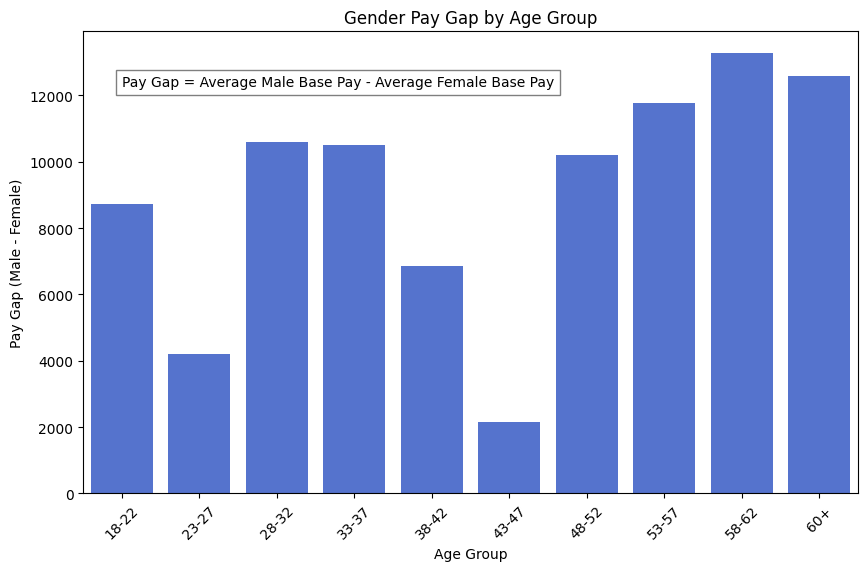

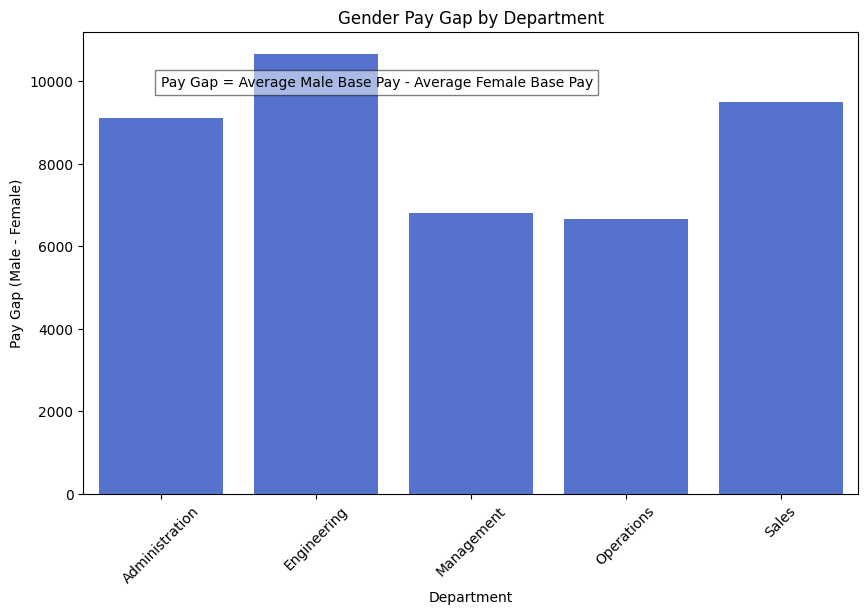

In [19]:
# Create age groups with consistent 5-year intervals
df_gender['Age Group'] = pd.cut(df_gender['Age'],
                                 bins=[18, 23, 28, 33, 38, 43, 48, 53, 58, 63, 100],
                                 labels=['18-22', '23-27', '28-32', '33-37', '38-42', '43-47', '48-52', '53-57', '58-62', '60+'])

# 1. Gender Pay Gap by Age Group
age_gender_pay = df_gender.groupby(['Age Group', 'Gender'])['BasePay'].mean().reset_index()
age_pivot = age_gender_pay.pivot(index='Age Group', columns='Gender', values='BasePay')
age_pivot['Pay Gap'] = age_pivot['Male'] - age_pivot['Female']

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=age_pivot.index, y=age_pivot['Pay Gap'], color='royalblue')
plt.title('Gender Pay Gap by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Pay Gap (Male - Female)')
plt.xticks(rotation=45)

# Add annotation text to explain the calculation
plt.text(0, max(age_pivot['Pay Gap']) * 0.95,
         'Pay Gap = Average Male Base Pay - Average Female Base Pay',
         fontsize=10, ha='left', va='top', bbox=dict(facecolor='white', alpha=0.5))

plt.show()

# 2. Gender Pay Gap by Department
dept_gender_pay = df_gender.groupby(['Dept', 'Gender'])['BasePay'].mean().reset_index()
dept_pivot = dept_gender_pay.pivot(index='Dept', columns='Gender', values='BasePay')
dept_pivot['Pay Gap'] = dept_pivot['Male'] - dept_pivot['Female']

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=dept_pivot.index, y=dept_pivot['Pay Gap'], color='royalblue')
plt.title('Gender Pay Gap by Department')
plt.xlabel('Department')
plt.ylabel('Pay Gap (Male - Female)')
plt.xticks(rotation=45)

# Add annotation text to explain the calculation
plt.text(0, max(dept_pivot['Pay Gap']) * 0.95,
         'Pay Gap = Average Male Base Pay - Average Female Base Pay',
         fontsize=10, ha='left', va='top', bbox=dict(facecolor='white', alpha=0.5))

plt.show()


## Educational Impact

### Does education level impact base pay or bonus, and does this relationship differ between genders?

In [6]:
# Group the data by education level and gender, and calculate the average base pay and bonus
education_gender_pay = df_gender.groupby(['Education', 'Gender'])[['BasePay', 'Bonus']].mean().reset_index()

# Display the results
print(education_gender_pay)

     Education  Gender        BasePay        Bonus
0      College  Female   86286.642276  6630.577236
1      College    Male   98214.008475  6458.220339
2  High School  Female   86027.053030  6167.765152
3  High School    Male   91417.203008  6110.706767
4      Masters  Female   92537.803738  6505.168224
5      Masters    Male  101227.610738  6432.201342
6          PhD  Female   96442.132075  6642.254717
7          PhD    Male  102642.113636  6849.477273


<ipython-input-26-92686c2e8256>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
<ipython-input-26-92686c2e8256>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')


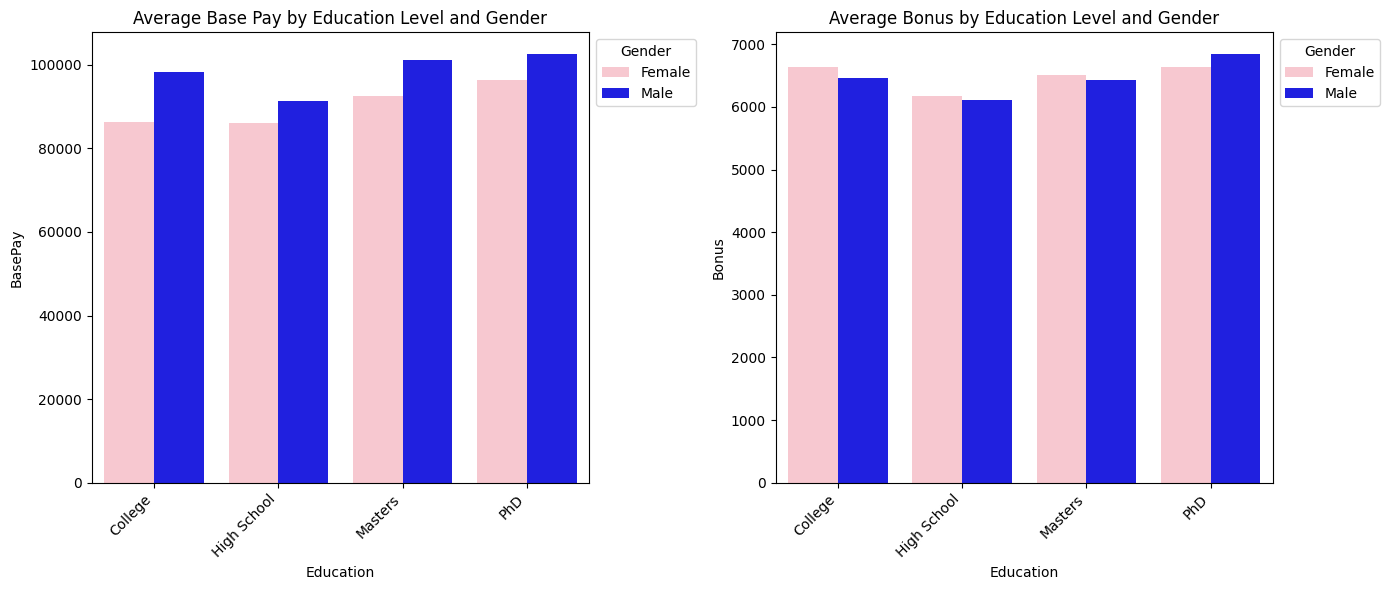

In [26]:
# Create bar plots for BasePay and Bonus
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Create two subplots

# Bar plot for BasePay
sns.barplot(x='Education', y='BasePay', hue='Gender', data=education_gender_pay, ax=axes[0],palette={'Female': 'pink', 'Male': 'blue'})
axes[0].set_title('Average Base Pay by Education Level and Gender')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].legend(title='Gender', loc='upper left', bbox_to_anchor=(1, 1))  # Legend outside

# Bar plot for Bonus
sns.barplot(x='Education', y='Bonus', hue='Gender', data=education_gender_pay, ax=axes[1],palette={'Female': 'pink', 'Male': 'blue'})
axes[1].set_title('Average Bonus by Education Level and Gender')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].legend(title='Gender', loc='upper left', bbox_to_anchor=(1, 1))  # Legend outside

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

### Are individuals with advanced degrees (e.g., Master's, PhD) receiving equitable compensation across departments and gender?

In [30]:
# Filter for individuals with advanced degrees (Master's, PhD)
advanced_degrees = df_gender[df_gender['Education'].isin(['Master\'s Degree', 'PhD'])]

# Group the filtered data by department and gender, and calculate the average base pay
advanced_degree_pay = advanced_degrees.groupby(['Dept', 'Gender'])['BasePay'].mean().reset_index()

# Display the results
print(advanced_degree_pay)

             Dept  Gender        BasePay
0  Administration  Female   84775.933333
1  Administration    Male   97065.666667
2     Engineering  Female   96363.409091
3     Engineering    Male  111626.964286
4      Management  Female  104049.277778
5      Management    Male  100736.714286
6      Operations  Female   94602.444444
7      Operations    Male   95887.640000
8           Sales  Female  100169.958333
9           Sales    Male  107692.166667


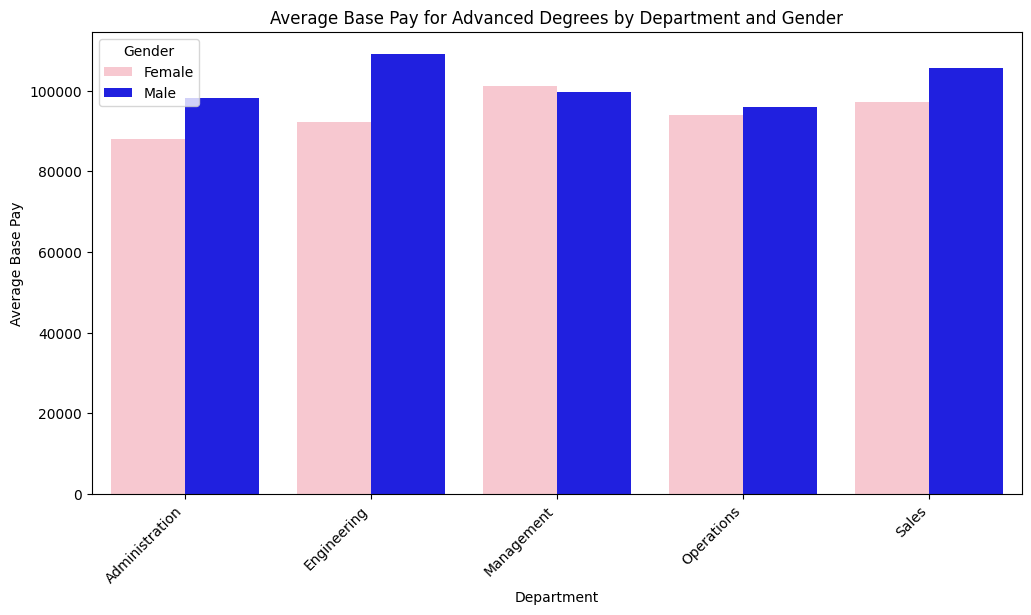

In [31]:
# Filter the dataset for employees with advanced degrees (e.g., Masters, PhD)
advanced_degree_pay = df_gender[df_gender['Education'].isin(['Masters', 'PhD'])]

# Group by department and gender to calculate average base pay
advanced_degree_pay = advanced_degree_pay.groupby(['Dept', 'Gender'])['BasePay'].mean().reset_index()

# Create a bar plot to visualize the average base pay
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.barplot(x='Dept', y='BasePay', hue='Gender', data=advanced_degree_pay, palette={'Female': 'pink', 'Male': 'blue'})
plt.title('Average Base Pay for Advanced Degrees by Department and Gender')
plt.xlabel('Department')
plt.ylabel('Average Base Pay')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


## Departmental Disparities

### Which departments have the largest gender-based pay gaps?

In [32]:
# Group the data by department and gender, and calculate the average base pay
department_gender_pay = df_gender.groupby(['Dept', 'Gender'])['BasePay'].mean().reset_index()

# Pivot the table to have departments as rows, genders as columns, and average base pay as values
pay_diff_table = department_gender_pay.pivot(index='Dept', columns='Gender', values='BasePay')

# Calculate the pay difference between male and female
pay_diff_table['Pay Difference'] = pay_diff_table['Male'] - pay_diff_table['Female']

# Sort the departments by pay difference in descending order
largest_pay_gaps = pay_diff_table.sort_values('Pay Difference', ascending=False)

# Display the departments with the largest pay gaps
print(largest_pay_gaps[['Pay Difference']].head())  # Display top 5 departments

Gender          Pay Difference
Dept                          
Engineering       10658.044944
Sales              9482.401924
Administration     9098.871214
Management         6803.285803
Operations         6662.282346


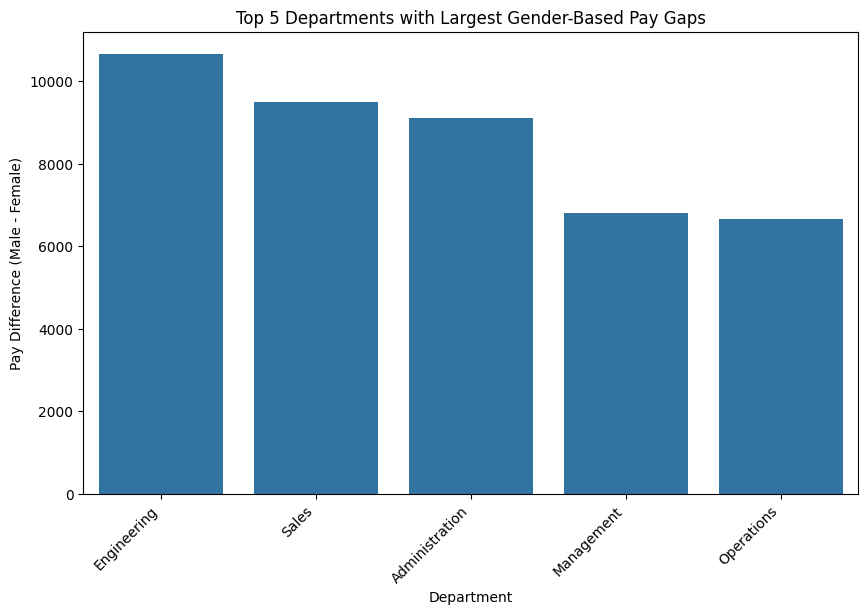

In [35]:
# Select the top N departments with the largest pay gaps (e.g., top 5)
top_n = 5  # You can change this value to display a different number of top departments
top_departments = largest_pay_gaps.head(top_n)

# Create a bar plot to visualize the pay difference for the top departments
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.barplot(x=top_departments.index, y='Pay Difference', data=top_departments)
plt.title(f'Top {top_n} Departments with Largest Gender-Based Pay Gaps')
plt.xlabel('Department')
plt.ylabel('Pay Difference (Male - Female)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

### Are certain departments more likely to promote individuals to senior positions regardless of gender?

In [33]:
# Define a function to categorize seniority levels
def categorize_seniority(seniority):
  if seniority >= 3:  # You might need to adjust this threshold based on your data
    return 'Senior'
  else:
    return 'Non-Senior'

# Apply the function to create a new 'Seniority Level' column
df_gender['Seniority Level'] = df_gender['Seniority'].apply(categorize_seniority)

# Group the data by department, gender, and seniority level, and count the occurrences
seniority_by_dept_gender = df_gender.groupby(['Dept', 'Gender', 'Seniority Level'])['JobTitle'].count().reset_index()

# Pivot the table to have departments as rows, genders as columns, and senior position counts as values
seniority_table = seniority_by_dept_gender.pivot(index=['Dept', 'Gender'], columns='Seniority Level', values='JobTitle').reset_index()

# Calculate the proportion of senior positions for each gender within each department
seniority_table['Senior Proportion'] = seniority_table['Senior'] / (seniority_table['Senior'] + seniority_table['Non-Senior'])

# Display the results
print(seniority_table)

Seniority Level            Dept  Gender  Non-Senior  Senior  Senior Proportion
0                Administration  Female          39      56           0.589474
1                Administration    Male          35      63           0.642857
2                   Engineering  Female          40      49           0.550562
3                   Engineering    Male          32      71           0.689320
4                    Management  Female          31      56           0.643678
5                    Management    Male          44      67           0.603604
6                    Operations  Female          41      55           0.572917
7                    Operations    Male          52      62           0.543860
8                         Sales  Female          34      67           0.663366
9                         Sales    Male          56      50           0.471698


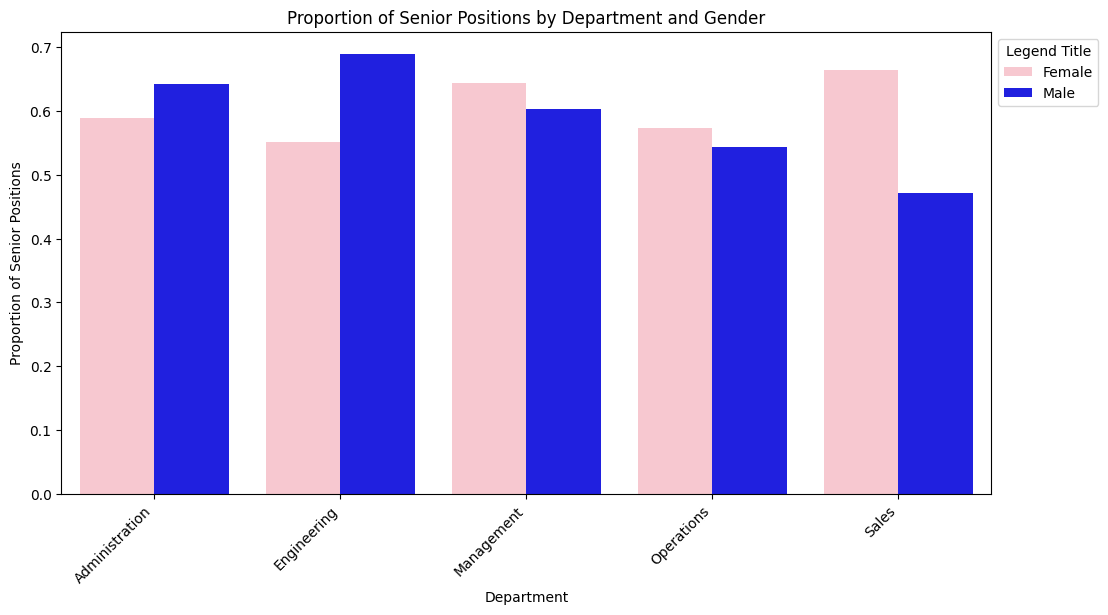

In [37]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Dept', y='Senior Proportion', hue='Gender', data=seniority_table,palette={'Female': 'pink', 'Male': 'blue'})
plt.title('Proportion of Senior Positions by Department and Gender')
plt.xlabel('Department')
plt.ylabel('Proportion of Senior Positions')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Legend Title', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

## Performance and Compensation

### Is performance evaluation equally linked to base pay and bonuses for male and female employees?

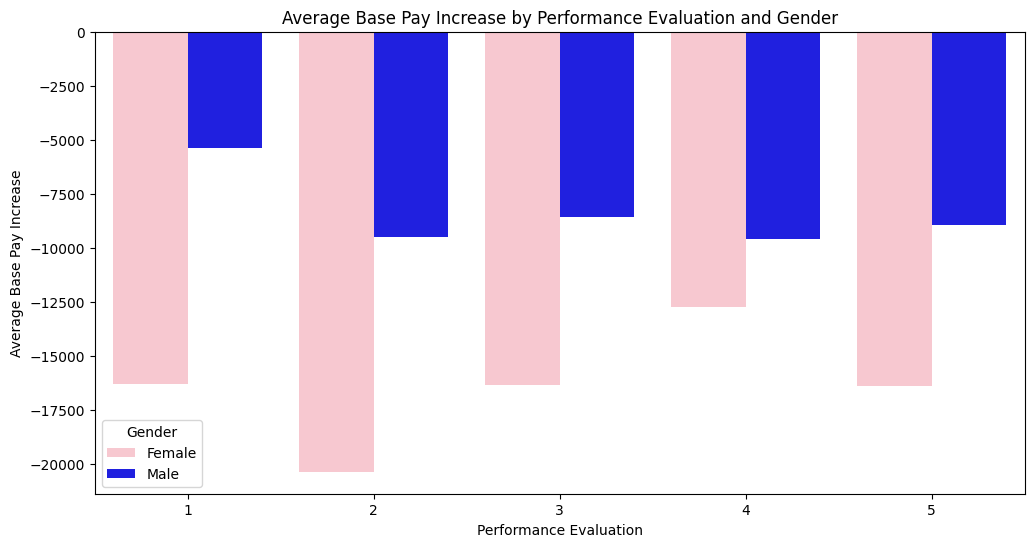

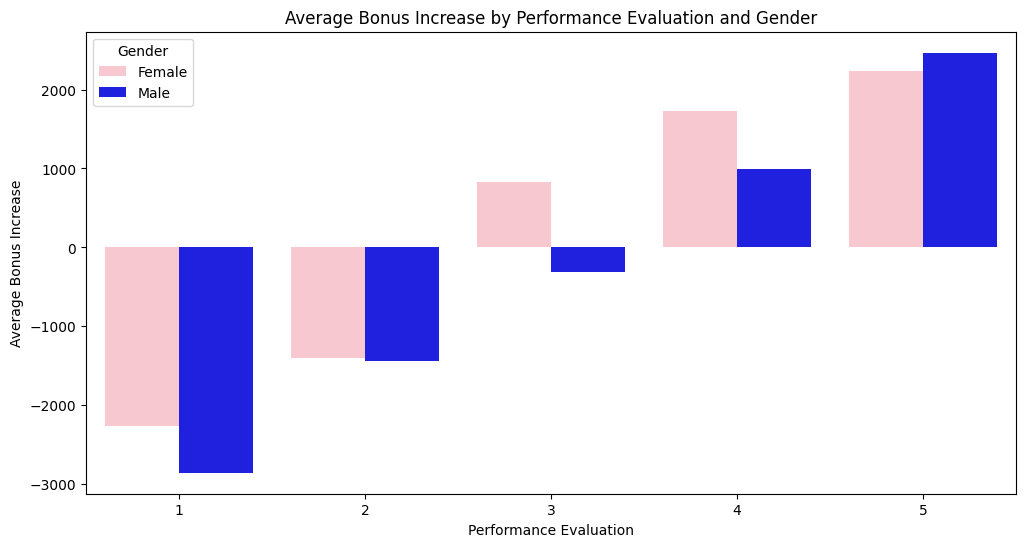

In [40]:
# If PriorBasePay and PriorBonus are not in the dataframe then use a dummy columns with random values

df_gender['PriorBasePay'] = np.random.randint(df_gender['BasePay'].min(), df_gender['BasePay'].max(), size=len(df_gender))
df_gender['PriorBonus'] = np.random.randint(df_gender['Bonus'].min(), df_gender['Bonus'].max(), size=len(df_gender))

# Calculate pay increases
df_gender['BasePayIncrease'] = df_gender['BasePay'] - df_gender['PriorBasePay']
df_gender['BonusIncrease'] = df_gender['Bonus'] - df_gender['PriorBonus']

# Group the data by gender, performance evaluation, and calculate average pay increases
pay_increase_analysis = df_gender.groupby(['Gender', 'PerfEval'])[['BasePayIncrease', 'BonusIncrease']].mean().reset_index()

# Create a bar plot to visualize the relationship for Base Pay Increase
plt.figure(figsize=(12, 6))
sns.barplot(x='PerfEval', y='BasePayIncrease', hue='Gender', data=pay_increase_analysis, palette={'Female': 'pink', 'Male': 'blue'})
plt.title('Average Base Pay Increase by Performance Evaluation and Gender')
plt.xlabel('Performance Evaluation')
plt.ylabel('Average Base Pay Increase')
plt.show()

# Create a similar bar plot for Bonus Increase
plt.figure(figsize=(12, 6))
sns.barplot(x='PerfEval', y='BonusIncrease', hue='Gender', data=pay_increase_analysis, palette={'Female': 'pink', 'Male': 'blue'})
plt.title('Average Bonus Increase by Performance Evaluation and Gender')
plt.xlabel('Performance Evaluation')
plt.ylabel('Average Bonus Increase')
plt.show()

## Seniority Trends

### Do men and women reach higher seniority levels at the same rate?

In [21]:
# Define a function to categorize seniority levels
def categorize_seniority(seniority):
    if seniority >= 3:  # You might need to adjust this threshold based on your data
        return 'Senior'
    else:
        return 'Non-Senior'

# Apply the function to create a new 'Seniority Level' column
df_gender['Seniority Level'] = df_gender['Seniority'].apply(categorize_seniority)

# Group the data by department, gender, and seniority level, and count the occurrences
seniority_by_gender = df_gender.groupby(['Gender', 'Seniority Level'])['JobTitle'].count().reset_index()

# Pivot the table to have departments as rows, genders as columns, and senior position counts as values
seniority_table = seniority_by_gender.pivot(index=['Gender'], columns='Seniority Level', values='JobTitle').reset_index()


# Calculate the proportion of senior positions for each gender within each department
seniority_table['Senior Proportion'] = seniority_table['Senior'] / (seniority_table['Senior'] + seniority_table['Non-Senior'])

# Display the results
print(seniority_table)

Seniority Level  Gender  Non-Senior  Senior  Senior Proportion
0                Female         185     283           0.604701
1                  Male         219     313           0.588346


### How does total compensation vary by seniority and gender across different education levels and departments

In [22]:
# Create a new column for total compensation (BasePay + Bonus)
df_gender['TotalCompensation'] = df_gender['BasePay'] + df_gender['Bonus']

# Create a model using ordinary least squares (OLS) regression
model = sm.ols('TotalCompensation ~ Gender + Seniority + Education + Dept + Gender*Seniority + Gender*Education + Gender*Dept',
               data=df_gender).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      TotalCompensation   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     31.87
Date:                Wed, 19 Feb 2025   Prob (F-statistic):           1.06e-81
Time:                        17:27:52   Log-Likelihood:                -11332.
No. Observations:                1000   AIC:                         2.270e+04
Df Residuals:                     982   BIC:                         2.279e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [23]:
# Graph 1: Total Compensation by Seniority, Gender, and Education (Interactive Scatter Plot)
fig = px.scatter(df_gender,
                 x='Seniority',
                 y='TotalCompensation',
                 color='Gender',
                 color_discrete_map={'Female': 'pink', 'Male': 'blue'},  # Set Female as pink and Male as blue
                 facet_col='Education',
                 hover_data=['Dept'],  # Add hover data if needed
                 title='Total Compensation by Seniority, Gender, and Education (Interactive)')
fig.update_traces(marker=dict(size=10))  # Adjust marker size as needed
fig.show()


In [17]:
# Graph 2: Total Compensation by Seniority, Gender, and Department (Interactive Scatter Plot)
fig = px.scatter(df_gender, x='Seniority', y='TotalCompensation', color='Gender',
                color_discrete_map={'Female': 'pink', 'Male': 'blue'},  # Set Female as pink and Male as blue
                 facet_col='Dept', facet_col_wrap=3, hover_data=['Education'],  # Add hover data if needed
                 title='Total Compensation by Seniority, Gender, and Department (Interactive)')
fig.update_traces(marker=dict(size=10))
fig.show()

### Is there a consistent pattern in pay differences across education levels as seniority increases?

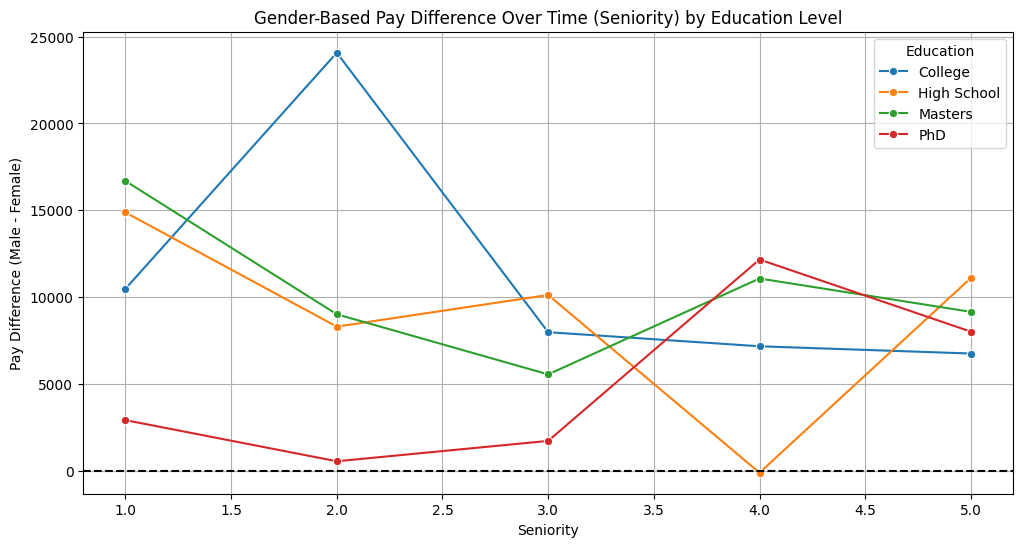

                            OLS Regression Results                            
Dep. Variable:                BasePay   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     38.22
Date:                Wed, 19 Feb 2025   Prob (F-statistic):           1.32e-73
Time:                        17:27:58   Log-Likelihood:                -11368.
No. Observations:                1000   AIC:                         2.276e+04
Df Residuals:                     987   BIC:                         2.283e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [24]:
# Group data by gender, seniority, education, and calculate average base pay
pay_over_time_edu = df_gender.groupby(['Gender', 'Seniority', 'Education'])['BasePay'].mean().reset_index()

# Calculate the difference in base pay between genders for each seniority and education level
pay_diff_over_time_edu = pay_over_time_edu.pivot_table(index=['Seniority', 'Education'],
                                                        columns='Gender', values='BasePay').reset_index()
pay_diff_over_time_edu['Pay Difference'] = pay_diff_over_time_edu['Male'] - pay_diff_over_time_edu['Female']

# Create a line plot to visualize the pay difference over time (seniority) for each education level
plt.figure(figsize=(12, 6))
sns.lineplot(x='Seniority', y='Pay Difference', hue='Education', data=pay_diff_over_time_edu, marker='o')
plt.title('Gender-Based Pay Difference Over Time (Seniority) by Education Level')
plt.xlabel('Seniority')
plt.ylabel('Pay Difference (Male - Female)')
plt.axhline(0, color='black', linestyle='--')  # Add a horizontal line at 0 for reference
plt.grid(True)
plt.show()

# Perform statistical analysis (e.g., regression with interaction terms)
import statsmodels.formula.api as sm
model = sm.ols('BasePay ~ Gender + Seniority + Education + Gender*Seniority + Gender*Education + Seniority*Education',
               data=df_gender).fit()
print(model.summary())

## References
OpenAI. (2025). ChatGPT (February 2025 version). https://chatgpt.com

We used AI to help with the coding